# The Base Model

In this model, we use the raw dataset from training.csv file, without any feature engineering (except for creating dummy variables for some features (ProviderId and PricingStrategy), as it's necessary step for modeling).

The Number of features we used for this base model is limited, only:
* ProviderId
* PricingStrategy
* Amount

# Import some Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score, precision_score, matthews_corrcoef
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics, preprocessing, model_selection
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings

from sklearn.linear_model import LogisticRegression

# Set random seed 
RSEED = 42

# Import the raw data training.csv

In [2]:
#import data

df = pd.read_csv("data/training.csv")
df.shape

(95662, 16)

# Creating Dummy Variables

In [3]:
# import make_dummies function from python script
from scripts.functions import make_dummies

In [4]:
# listing the features for One-hot-encoding

ls = ['PricingStrategy', 'ProviderId']

# creating dummies, this function will automatically delete the original column
df = make_dummies(df, ls)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProductId             95662 non-null  object 
 8   ProductCategory       95662 non-null  object 
 9   ChannelId             95662 non-null  object 
 10  Amount                95662 non-null  float64
 11  Value                 95662 non-null  int64  
 12  TransactionStartTime  95662 non-null  object 
 13  FraudResult           95662 non-null  int64  
 14  PricingStrategy_1     95662 non-null  uint8  
 15  PricingStrategy_2  

# Features Selection

In [6]:
# import function from script
from scripts.functions import remove_columns

In [7]:
drop_list = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', "ChannelId",
           'CurrencyCode', 'CountryCode', 'ProductId', 'ProductCategory', 'Value', 
           'TransactionStartTime']
df = remove_columns(df, drop_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Amount             95662 non-null  float64
 1   FraudResult        95662 non-null  int64  
 2   PricingStrategy_1  95662 non-null  uint8  
 3   PricingStrategy_2  95662 non-null  uint8  
 4   PricingStrategy_4  95662 non-null  uint8  
 5   ProviderId_2       95662 non-null  uint8  
 6   ProviderId_3       95662 non-null  uint8  
 7   ProviderId_4       95662 non-null  uint8  
 8   ProviderId_5       95662 non-null  uint8  
 9   ProviderId_6       95662 non-null  uint8  
dtypes: float64(1), int64(1), uint8(8)
memory usage: 2.2 MB


# Spliting X and Y sets

In [8]:
X_w = df.drop("FraudResult", axis = 1)
y_w= df.FraudResult

In [9]:
# Split the data
X_trainW, X_testW, y_trainW, y_testW = train_test_split(X_w, y_w, test_size = 0.3, random_state = 10, stratify = y_w)

In [10]:
display(X_trainW.shape)
display(X_testW.shape)

(66963, 9)

(28699, 9)

# M1 KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28641
           1       0.97      0.64      0.77        58

    accuracy                           1.00     28699
   macro avg       0.99      0.82      0.89     28699
weighted avg       1.00      1.00      1.00     28699

acc: 0.9992334227673438
mcc: 0.7878083466990133
Confusion matrix, without normalization
[[28640     1]
 [   21    37]]


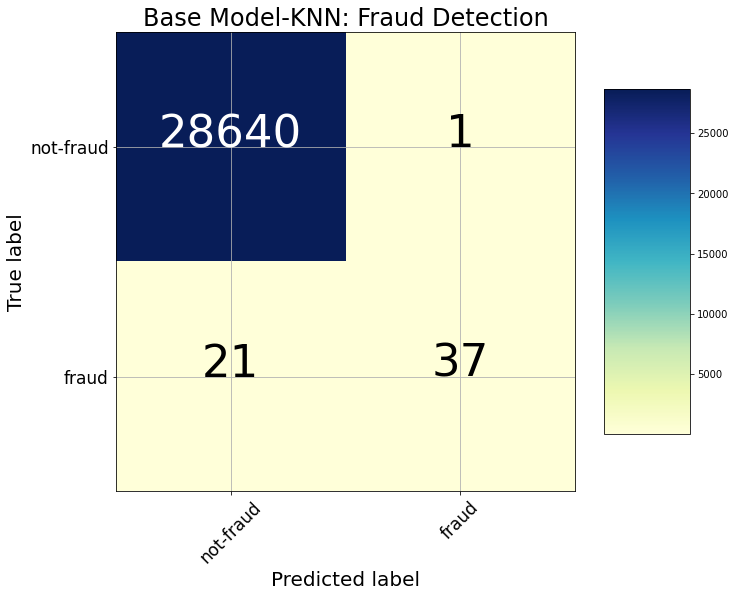

In [11]:
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

knn_model = knn.fit(X_trainW, y_trainW)
y_pred = knn.predict(X_testW)

# Evaluate your model 
cm = confusion_matrix(y_testW, y_pred)

#classification Report
report = classification_report(y_testW, y_pred)
print(report)


accuracy = accuracy_score(y_testW, y_pred)
print(f"acc: {accuracy}")

#MCC score
mcc = matthews_corrcoef(y_testW, y_pred)
print(f"mcc: {mcc}")


from scripts.confusion_matrix import plot_confusion_matrix #import function from script
plot_confusion_matrix(cm, classes = ['not-fraud', 'fraud'], cmap='YlGnBu', title = "Base Model-KNN: Fraud Detection");

# TAKEN M1 Random Forest Base Models

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28641
           1       0.87      0.69      0.77        58

    accuracy                           1.00     28699
   macro avg       0.93      0.84      0.88     28699
weighted avg       1.00      1.00      1.00     28699

acc: 0.9991637339280114
mcc: 0.7740057303164004
Confusion matrix, without normalization
[[28635     6]
 [   18    40]]


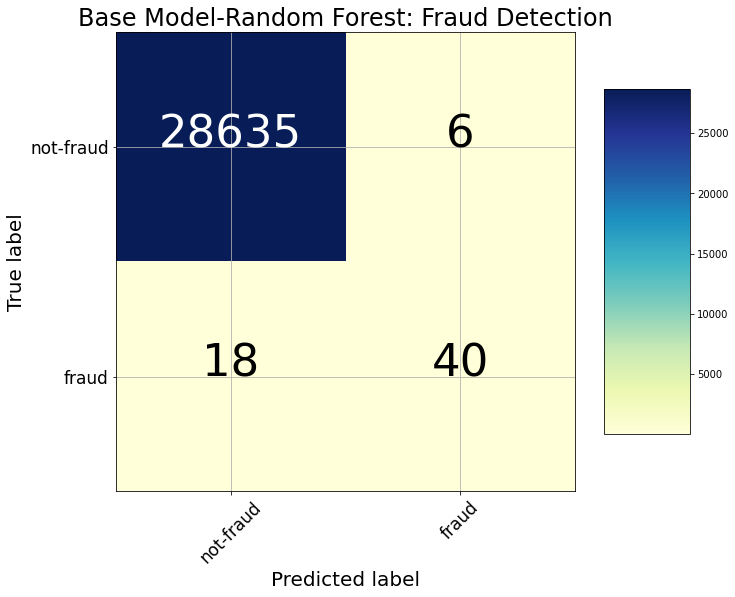

In [12]:
rdm = RandomForestClassifier(random_state = 42 ) 

rdm_model = rdm.fit(X_trainW, y_trainW)
y_pred = rdm.predict(X_testW)

# Evaluate your model 
cm = confusion_matrix(y_testW, y_pred)

#classification Report

report = classification_report(y_testW, y_pred)
print(report)

accuracy = accuracy_score(y_testW, y_pred)
print(f"acc: {accuracy}")

#MCC score
mcc = matthews_corrcoef(y_testW, y_pred)
print(f"mcc: {mcc}")

from scripts.confusion_matrix import plot_confusion_matrix #import function from script
plot_confusion_matrix(cm, classes = ['not-fraud', 'fraud'], cmap='YlGnBu', title = "Base Model-Random Forest: Fraud Detection");

warnings.filterwarnings('ignore')

# M1 XGBoost Base Models

[09:52:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28641
           1       0.91      0.67      0.77        58

    accuracy                           1.00     28699
   macro avg       0.95      0.84      0.89     28699
weighted avg       1.00      1.00      1.00     28699

acc: 0.9991985783476777
mcc: 0.7805711124608172
Confusion matrix, without normalization
[[28637     4]
 [   19    39]]


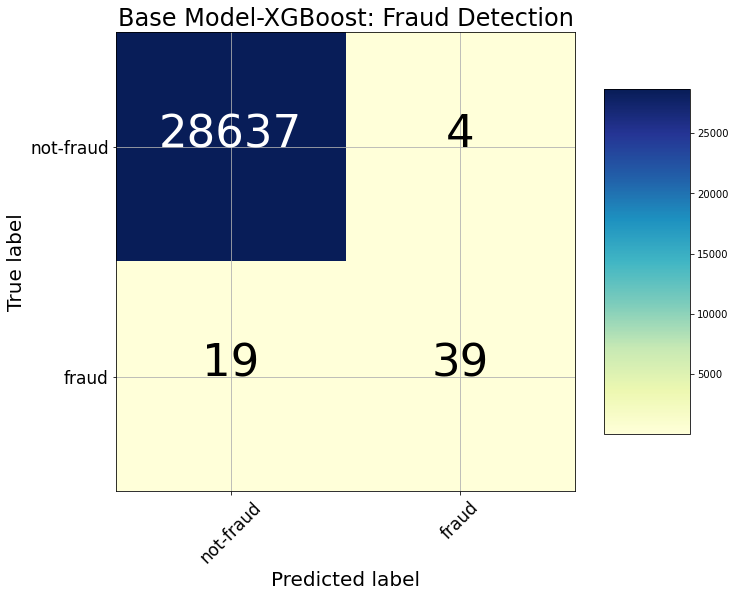

In [13]:
#XGBoost Model

xgb = XGBClassifier()

test = xgb.fit(X_trainW, y_trainW)

# Make predictions on test set 
y_pred = xgb.predict(X_testW)

# Evaluate your model 
cm = confusion_matrix(y_testW, y_pred)

#classification Report

report = classification_report(y_testW, y_pred)
print(report)

accuracy = accuracy_score(y_testW, y_pred)
print(f"acc: {accuracy}")

#MCC score
mcc = matthews_corrcoef(y_testW, y_pred)
print(f"mcc: {mcc}")


#import function from python scripts
from scripts.confusion_matrix import plot_confusion_matrix 

plot_confusion_matrix(cm, classes = ['not-fraud', 'fraud'], cmap='YlGnBu', title = "Base Model-XGBoost: Fraud Detection")
#sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);